In [216]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [217]:
# !nrnivmodl mod

In [218]:
ls -li O1_data_physiology

total 32595000
46664532 drwxr-x--- 2 fernando fernando        4096 May 16 10:11 atlas/
45553362 -rw-rw---- 1 fernando fernando        4016 Nov  1 15:26 circuit_config.json
46565132 drwxr-x--- 2 fernando fernando        4096 May 16 10:11 emodels_hoc/
45553243 -rw-rw---- 1 fernando fernando 16413524736 May 16 09:12 external_midrange__S1nonbarrel_neurons__chemical.h5
45482172 -rw-rw---- 1 fernando fernando 16871616488 May 16 08:57 external_S1nonbarrel_neurons__S1nonbarrel_neurons__chemical.h5
45553242 -rw-rw---- 1 fernando fernando         138 May 16 10:11 license.txt
45553241 -rw-rw---- 1 fernando fernando    30963387 May 16 10:11 mapping.json
46553389 drwxrwx--- 2 fernando fernando        4096 May 16 11:59 midrange__S1nonbarrel_neurons__chemical/
45744477 drwxr-xr-x 2 fernando fernando        4096 Jun 20 05:04 mod/
45482181 drwxr-x--- 3 fernando fernando        4096 May 16 10:12 morphologies/
45553244 -rw-rw---- 1 fernando fernando     2859666 Jun  9 12:01 node_sets.json
45482119 -rw-rw

In [219]:
CircuitPath = '/home/fernando/Documents/SCx_model/O1_data_physiology/'

Atlas = CircuitPath + 'atlas/'

MorphologyPath = CircuitPath + 'morphologies/ascii/'

nrnPath = CircuitPath + 'S1nonbarrel_neurons__S1nonbarrel_neurons__chemical/edges.h5'

CellLibraryFile = CircuitPath + 'S1nonbarrel_neurons/nodes.h5'

METypePath = CircuitPath + 'emodels_hoc/'


# Path = CircuitPath + 'sonata/edges/edges_hippocampus_projections.h5'

lst_properties = [ 'etype', 'exc_mini_frequency', 'inh_mini_frequency', 'layer', 'me_combo', 'model_template', 'model_type', 'morph_class', 'morphology', 'mtype', 
                  'orientation_w', 'orientation_x', 'orientation_y', 'orientation_z', 'population', 'region', 'synapse_class', '@dynamics:holding_current', 
                  '@dynamics:input_resistance', '@dynamics:resting_potential', '@dynamics:threshold_current', 'x', 'y', 'z']

In [220]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import json

from bluepysnap import Circuit
from bluepysnap.bbp import Cell

circuit_path = CircuitPath + 'circuit_config.json'
circuit = Circuit(circuit_path)

In [221]:
print(circuit.nodes.population_names)
print()
print(circuit.edges.population_names)


['POm', 'S1nonbarrel_neurons', 'VPM', 'external_S1nonbarrel_neurons__S1nonbarrel_neurons__chemical', 'external_midrange__S1nonbarrel_neurons__chemical']

['POm__S1nonbarrel_neurons__chemical', 'S1nonbarrel_neurons__S1nonbarrel_neurons__chemical', 'VPM__S1nonbarrel_neurons__chemical', 'external_S1nonbarrel_neurons__S1nonbarrel_neurons__chemical', 'external_midrange__S1nonbarrel_neurons__chemical', 'midrange__S1nonbarrel_neurons__chemical']


In [222]:
ls -li

total 89933132
40639251 -rw-rw-r--  1 fernando fernando    27127766 Oct 28 18:27  2023.05.17.541168v3.full.pdf
40657821 -rw-rw-r--  1 fernando fernando      525431 Oct 30 12:59 'Analyze connectivity reach.ipynb'
40657829 -rw-rw-r--  1 fernando fernando      484566 Nov  1 21:18 'Analyze connectivity strengths.ipynb'
40729438 -rw-rw-r--  1 fernando fernando       97411 Nov  3 20:00  Circuitexamples.ipynb
40699441 -rw-rw-r--  1 fernando fernando       25133 Nov  1 15:25 'Circuit exploration examples.ipynb'
45482140 -rw-rw-r--  1 fernando fernando     3115565 Nov  9 20:21  import_3Dplots_rearange.ipynb
45553431 -rw-rw-r--  1 fernando fernando     3252339 Nov  9 15:54  import_sonatafiles.ipynb
40640217 -rw-rw-r--  1 fernando fernando     2859666 Oct 30 12:59  node_sets.json
45482179 -rw-rw-r--  1 fernando fernando    57236573 Nov  9 21:42  nodes_new.h5
46531755 drwxrwx--- 11 fernando fernando        4096 Nov  1 19:53  O1_data_anatomy/
40636359 -rw-rw-r--  1 fernando fernando 42759024632 Oct

In [223]:
f = open('node_sets.json') 
node_sets = json.load(f) 
   
print(node_sets.keys())
print(len(node_sets['hex2']['node_id']))

dict_keys(['Layer2Excitatory', 'Layer3Excitatory', 'Layer23Excitatory', 'Layer4Excitatory', 'Layer5Excitatory', 'Layer6Excitatory', 'Layer2346Excitatory', 'Layer1Inhibitory', 'Layer23Inhibitory', 'Layer4Inhibitory', 'Layer5Inhibitory', 'Layer6Inhibitory', 'hex0', 'hex1', 'hex2', 'hex3', 'hex4', 'hex5', 'hex6', 'hex_O1', 'proj_Thalamocortical_VPM_Source', 'proj_Thalamocortical_POM_Source', 'Mosaic', 'All', 'Excitatory', 'Inhibitory', 'L1_DAC', 'L1_HAC', 'L1_LAC', 'L1_NGC-DA', 'L1_NGC-SA', 'L1_SAC', 'L23_BP', 'L23_BTC', 'L23_CHC', 'L23_DBC', 'L23_LBC', 'L23_MC', 'L23_NBC', 'L23_NGC', 'L23_SBC', 'L2_IPC', 'L2_TPC:A', 'L2_TPC:B', 'L3_TPC:A', 'L3_TPC:C', 'L4_BP', 'L4_BTC', 'L4_CHC', 'L4_DBC', 'L4_LBC', 'L4_MC', 'L4_NBC', 'L4_NGC', 'L4_SBC', 'L4_SSC', 'L4_TPC', 'L4_UPC', 'L5_BP', 'L5_BTC', 'L5_CHC', 'L5_DBC', 'L5_LBC', 'L5_MC', 'L5_NBC', 'L5_NGC', 'L5_SBC', 'L5_TPC:A', 'L5_TPC:B', 'L5_TPC:C', 'L5_UPC', 'L6_BP', 'L6_BPC', 'L6_BTC', 'L6_CHC', 'L6_DBC', 'L6_HPC', 'L6_IPC', 'L6_LBC', 'L6_MC', 'L

In [224]:
cells = circuit.nodes["S1nonbarrel_neurons"]

conn = circuit.edges["S1nonbarrel_neurons__S1nonbarrel_neurons__chemical"]

In [225]:
# connsinfo = conn.get()

## Cells info

In [226]:
nodesinfo = cells.get()
nodesinfo

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 0:
  #000: H5G.c line 510 in H5Gopen2(): unable to open group
    major: Symbol table
    minor: Can't open object
  #001: H5VLcallback.c line 4187 in H5VL_group_open(): group open failed
    major: Virtual Object Layer
    minor: Can't open object
  #002: H5VLcallback.c line 4154 in H5VL__group_open(): group open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: H5VLnative_group.c line 123 in H5VL__native_group_open(): unable to open group
    major: Symbol table
    minor: Can't open object
  #004: H5Gint.c line 270 in H5G__open_name(): group not found
    major: Symbol table
    minor: Object not found
  #005: H5Gloc.c line 442 in H5G_loc_find(): can't find object
    major: Symbol table
    minor: Object not found
  #006: H5Gtraverse.c line 837 in H5G_traverse(): internal path traversal failed
    major: Symbol table
    minor: Object not found
  #007: H5Gtraverse.c line 613 in H5G__traverse_real(): travers

RuntimeError: Unable to open the group "/nodes": (Symbol table) Object not found

In [134]:
nodesinfoS1J = nodesinfo.loc[nodesinfo["region"]=="S1J", [ 'etype', 'layer', 'me_combo', 'model_template', 'model_type', 'morph_class', 'morphology', 'mtype', 
                  'synapse_class','x', 'y', 'z']]

In [135]:
nodesinfoS1J

,etype,layer,me_combo,model_template,model_type,morph_class,morphology,mtype,synapse_class,x,y,z
node_ids,,,,,,,,,,,,
1,cNAC,1,cNAC_L23NGC_L1_DAC_1_C270106A_-_Scale_x1.000_y...,hoc:cNAC_L23NGC,biophysical,INT,C270106A_-_Scale_x1.000_y1.025_z1.000,L1_DAC,INH,4977.735899,-1641.041348,-2140.579908
2,bNAC,1,bNAC_L23NGC_L1_DAC_1_sm120429_2photon_a1-3_idA...,hoc:bNAC_L23NGC,biophysical,INT,sm120429_2photon_a1-3_idA_-_Scale_x1.000_y0.97...,L1_DAC,INH,5011.718764,-1565.779688,-2212.599874
17,bNAC,1,bNAC_L23NGC_L1_DAC_1_sm080930a1-5_idC_-_Scale_...,hoc:bNAC_L23NGC,biophysical,INT,sm080930a1-5_idC_-_Scale_x1.000_y1.025_z1.000,L1_DAC,INH,4970.817824,-1561.327193,-2255.189285
20,bNAC,1,bNAC_L23NGC_L1_DAC_1_sm080930a1-5_idC,hoc:bNAC_L23NGC,biophysical,INT,sm080930a1-5_idC,L1_DAC,INH,4933.711833,-1666.673320,-2186.070672
26,cNAC,1,cNAC_L6NGC_L1_DAC_1_sm080723a1-4_idC_-_Scale_x...,hoc:cNAC_L6NGC,biophysical,INT,sm080723a1-4_idC_-_Scale_x1.000_y0.950_z1.000,L1_DAC,INH,5044.002461,-1578.325860,-2200.383997
...,...,...,...,...,...,...,...,...,...,...,...,...
211641,cACint,5,cACint_L23MC_L5_BP_5_rp110127_L5-2_idC_-_Scale...,hoc:cACint_L23MC,biophysical,INT,rp110127_L5-2_idC_-_Scale_x1.000_y1.025_z1.000...,L5_BP,INH,4443.921325,-1580.809715,-2743.148995
211667,bAC,5,bAC_L23BTC_L5_BP_5_rp110127_L5-2_idC_-_Scale_x...,hoc:bAC_L23BTC,biophysical,INT,rp110127_L5-2_idC_-_Scale_x1.000_y0.975_z1.000,L5_BP,INH,4268.319179,-1441.487671,-2969.556430
211675,bIR,5,bIR_L23BP_L5_BP_5_C240300C1_-_Scale_x1.000_y0....,hoc:bIR_L23BP,biophysical,INT,C240300C1_-_Scale_x1.000_y0.950_z1.000_-_Clone_0,L5_BP,INH,4206.338423,-1434.357147,-2928.272692


In [45]:
import seaborn as sns

In [ ]:
lst_properties = [ 'etype', 'exc_mini_frequency', 'inh_mini_frequency', 'layer', 'me_combo', 'model_template', 'model_type', 'morph_class', 'morphology', 'mtype', 
                  'orientation_w', 'orientation_x', 'orientation_y', 'orientation_z', 'population', 'region', 'synapse_class', '@dynamics:holding_current', 
                  '@dynamics:input_resistance', '@dynamics:resting_potential', '@dynamics:threshold_current', 'x', 'y', 'z']

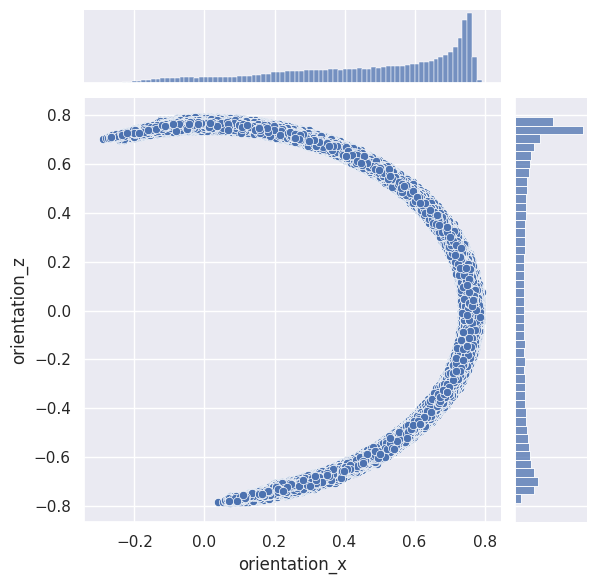

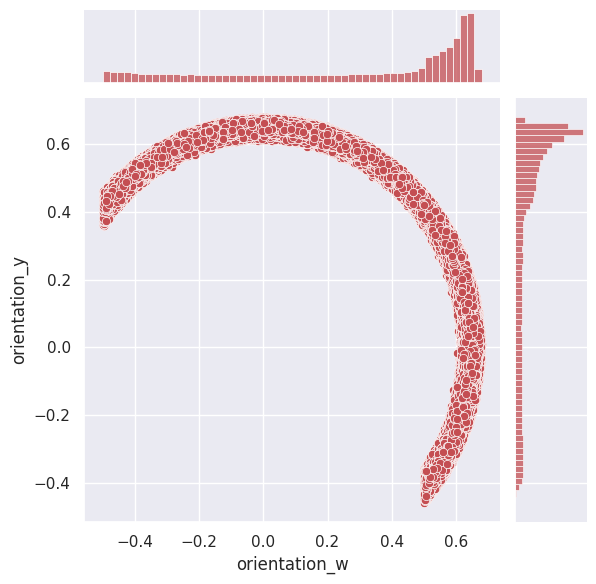

In [104]:
# with sns.axes_style("white"):
# # sns.jointplot(x=x, y=y, kind="kde", color="b");
#     sns.jointplot(data=nodesinfo, x='orientation_w', y='orientation_y', kind="kde", color="b")

sns.jointplot(data=nodesinfo, x='orientation_x', y='orientation_z', color="b")
sns.jointplot(data=nodesinfo, x='orientation_w', y='orientation_y', color="r")

In [96]:
len(list(cells.property_values(Cell.ME_COMBO
                     )))

88345

In [59]:
cells.property_values(Cell.REGION)

{'S1DZ', 'S1FL', 'S1J'}

In [11]:
mtypes = cells.property_values(Cell.MTYPE)

In [12]:
mtypes = list(mtypes)

In [13]:
i = 0
mntypes = {}
for mn in sorted(mtypes):
    mntypes[mn] = i
    i+=1

In [130]:
# mntypes

In [14]:
# mntypes['ca3'] = 12
# mtypes.append('ca3')

In [171]:
# %matplotlib widget
from mpl_toolkits import mplot3d

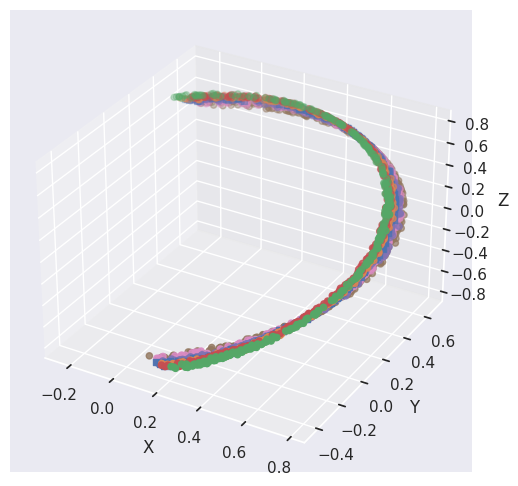

In [191]:
# %matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, morpho in [('s', 'hex0'),  ('o', 'hex1'),  ('o', 'hex2'),('o', 'hex3'),  ('o', 'hex4'),  ('o', 'hex5'),('o', 'hex6')]:
    
    nodeprex = []
    nodeprez = []       
    nodeprey = [] 
    nodepremtype = []    
    for gid in node_sets[morpho]['node_id']: 
        if nodesinfo['region'][gid]!='xS1FL':  
            if 'L1' in nodesinfo['mtype'][gid]:     
                nodeprex.append(nodesinfo['orientation_x'][gid])
                nodeprey.append(nodesinfo['orientation_y'][gid])
                nodeprez.append(nodesinfo['orientation_z'][gid])
                nodepremtype.append(mntypes[nodesinfo['mtype'][gid]])
    

    ax.scatter(nodeprex, nodeprey, nodeprez, marker=m)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

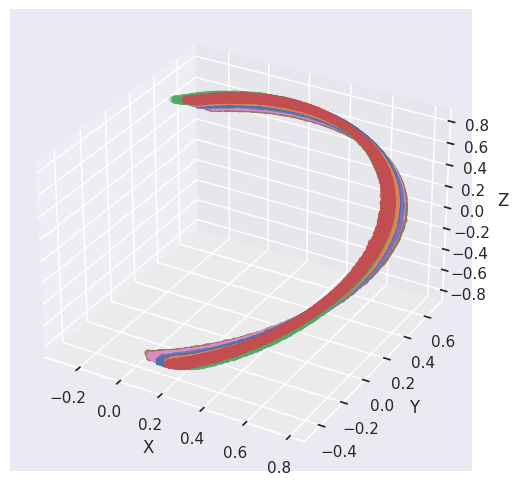

In [211]:
# %matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, morpho in [('s', 'hex0'),  ('o', 'hex1'),  ('o', 'hex2'),('o', 'hex3'),  ('o', 'hex4'),  ('o', 'hex5'),('o', 'hex6')]:
    
    nodeprex = []
    nodeprez = []       
    nodeprey = [] 
    nodeprew = [] 
    nodepremtype = []    
    for gid in node_sets[morpho]['node_id']: 
        if nodesinfo['region'][gid]!='xS1FL':  
            if 'L' in nodesinfo['mtype'][gid]:     
                nodeprex.append(nodesinfo['orientation_x'][gid])
                nodeprey.append(nodesinfo['orientation_y'][gid])
                nodeprez.append(nodesinfo['orientation_z'][gid])
                nodeprew.append(nodesinfo['orientation_w'][gid])
                nodepremtype.append(mntypes[nodesinfo['mtype'][gid]])
    

    ax.scatter(nodeprex, nodeprey, nodeprez, marker=m)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [108]:
nodeprex = []
nodeprez = []       
nodeprey = [] 
nodepremtype = []    
for gid in range(211712):
#     if nodesinfo['region'][gid][0:3]!='mc9':    
    if nodesinfo['mtype'][gid]=='L4_TPC':     
        nodeprex.append(nodesinfo['x'][gid])
        nodeprey.append(nodesinfo['y'][gid])
        nodeprez.append(nodesinfo['z'][gid])
        nodepremtype.append(mntypes[nodesinfo['mtype'][gid]])
        
# for gid in range(18198):
#     if nodesinfo['mtype'][gid]!='SP_PC':     
#         nodeprex.append(nodesinfo['x'][gid])
#         nodeprey.append(nodesinfo['y'][gid])
#         nodeprez.append(nodesinfo['z'][gid])
#         nodepremtype.append(mntypes[nodesinfo['mtype'][gid]])

S1FL - 30189 cells


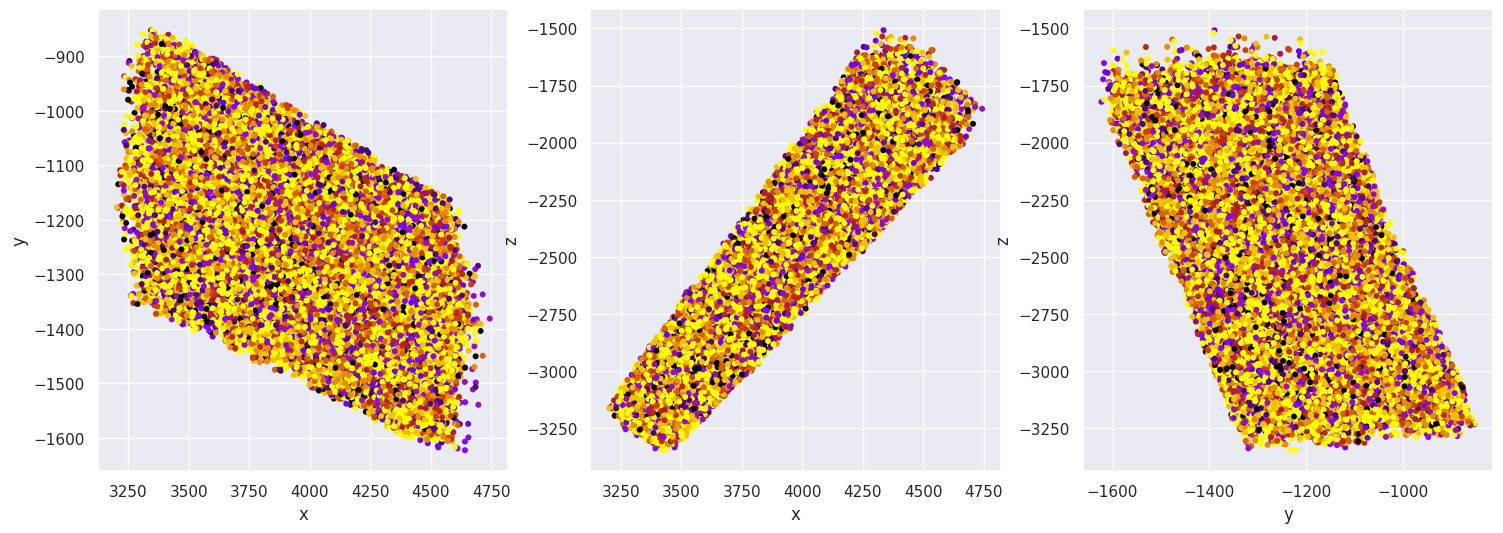

In [213]:
# plot the results
fig=plt.figure(figsize=(18,6))

for ii,reg in enumerate(['S1FL']):
    
    nodeprex = []
    nodeprez = []       
    nodeprey = [] 
    nodepremtype = []    
    for gid in node_sets['hex0']['node_id']:
        if nodesinfo['region'][gid]==reg:  
            nodeprex.append(nodesinfo['x'][gid])
            nodeprey.append(nodesinfo['y'][gid])
            nodeprez.append(nodesinfo['z'][gid])
            nodepremtype.append(nodesinfo['orientation_y'][gid])
#             nodepremtype.append(mntypes[nodesinfo['mtype'][gid]])

    plt.subplot(1,3,1)
    plt.scatter(nodeprex,nodeprey, lw=0.05, s=18,
                c=nodepremtype, cmap=plt.cm.get_cmap('gnuplot', 12))
    plt.xlabel('x', fontsize=12)
    plt.ylabel('y', fontsize=12)


    plt.subplot(1,3,2)
    plt.scatter(nodeprex,nodeprez, lw=0.05, s=18,
                c=nodepremtype, cmap=plt.cm.get_cmap('gnuplot', 12))
    plt.xlabel('x', fontsize=12)
    plt.ylabel('z', fontsize=12)


    plt.subplot(1,3,3)
    plt.scatter(nodeprey,nodeprez, lw=0.05, s=18,
                c=nodepremtype, cmap=plt.cm.get_cmap('gnuplot', 12))
    plt.xlabel('y', fontsize=12)
    plt.ylabel('z', fontsize=12)


    
    print("%s - %d cells" % (reg,len(nodeprex)))

# cbar=plt.colorbar()              # the mystery step
# cbar.set_ticks([n+0.5 for n in range(12)])
# cbar.set_ticklabels(mtypes)
# plt.clim(0, 12)
# plt.grid(False)
# layer_heights = (0, 170, 230, 510, 660)
# heights = (100, 210, 365, 570)
# layers = ('SO', 'SP', 'SR', 'SLM')
# plt.hlines(layer_heights, np.min(nodeprex)-110, np.max(nodeprex), linestyle='--', colors='r')
# for layer, height in zip(layers, heights):
#     plt.text(np.min(nodeprex)-110, height, layer, fontsize=14, color='r')
# plt.xlabel('x', fontsize=12)
# plt.ylabel('y', fontsize=12)
# plt.yticks([0, 170, 230, 510, 660])
# plt.xlim(-240,960)
# plt.ylim(0,600)
# plt.xticks([-240,0,240,480,720,960])
# plt.xticks(fontsize=12);
# plt.yticks(fontsize=12);
# plt.gca().invert_yaxis();

/tmp/ipykernel_23210/2371802712.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar=plt.colorbar()              # the mystery step


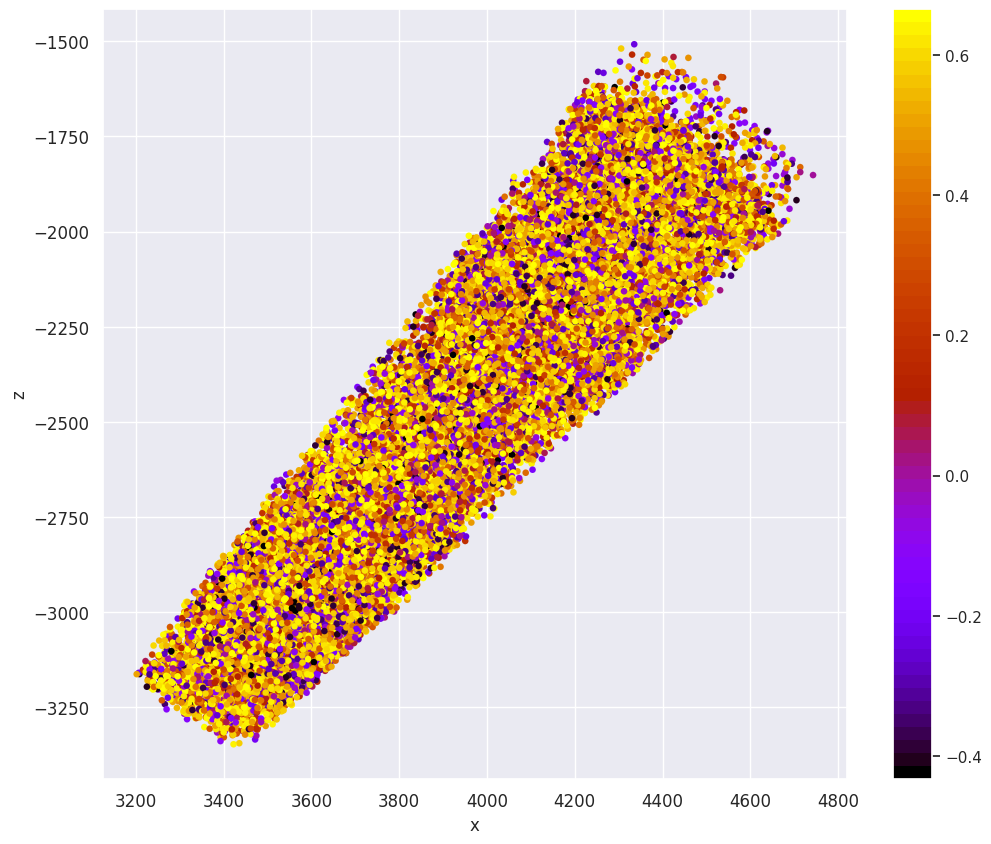

In [215]:
# plot the results
fig=plt.figure(figsize=(12,10))
plt.scatter(nodeprex,nodeprez, lw=0.05, s=22,
            c=nodepremtype, cmap=plt.cm.get_cmap('gnuplot', 59))

plt.grid(True)
cbar=plt.colorbar()              # the mystery step
# cbar.set_ticks([n+0.5 for n in range(60)])
# cbar.set_ticklabels(mtypes)
# plt.clim(0, 60)
plt.xlabel('x', fontsize=12)
plt.ylabel('z', fontsize=12)
# plt.xlim(np.min(nodepre2)-0.5,np.min(nodepre2)+400.5)
# plt.ylim(np.min(nodepre2)-0.5,np.min(nodepre2)+400.5)
#plt.xticks(fontsize=14, rotation=90)
# plt.xlim(230,490)
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

In [212]:
print(np.max(nodeprex)-np.min(nodeprex),np.max(nodeprey)-np.min(nodeprey),np.max(nodeprez)-np.min(nodeprez))
print(np.max(nodeprex),np.min(nodeprex),np.max(nodeprey),np.min(nodeprey),np.max(nodeprez),np.min(nodeprez))

0.9407479591751965 1.0654486665491432 1.5522258674939797
0.7795027433876764 -0.16124521578752005 0.6518833469225422 -0.413565319626601 0.7780590487597372 -0.7741668187342424


In [35]:
# each column area
area = (3*np.sqrt(3)*240**2)/2 # six triag l = 240, h =  240*np.sqrt(3)/2
diam = 2*np.sqrt(area/np.pi) #equiv circle
diam

436.5080368764948

In [36]:
list(nodesinfo)

['etype',
 'exc_mini_frequency',
 'inh_mini_frequency',
 'layer',
 'me_combo',
 'model_template',
 'model_type',
 'morph_class',
 'morphology',
 'mtype',
 'orientation_w',
 'orientation_x',
 'orientation_y',
 'orientation_z',
 'population',
 'region',
 'synapse_class',
 'x',
 'y',
 'z',
 '@dynamics:holding_current',
 '@dynamics:input_resistance',
 '@dynamics:resting_potential',
 '@dynamics:threshold_current']

In [37]:
most_central_10_SP_PC = [11617, 6393, 6789, 6243, 13513, 14311, 9397, 3699, 12245, 12001]
most_central_10_SP_PC = most_central_10_SP_PC - np.ones_like(most_central_10_SP_PC)

# most_central_10_SP_PC = range(18198)
most_central_10_SP_PC = range(35,40)
Morpholist = []
hoclist = []
for gid in most_central_10_SP_PC:
    MorphoName = MorphologyPath + nodesinfo['morphology'][gid] + '.swc'
    hocName = METypePath + nodesinfo['model_template'][gid][4:] + '.hoc'
    cellName = nodesinfo['model_template'][gid][4:]  
    mcName = nodesinfo['region'][gid][:3]  
    layerName = nodesinfo['region'][gid][4:]  
    print('%s\n %s %.2f %.2f %.2f' % (nodesinfo['model_template'][gid],nodesinfo['region'][gid],nodesinfo['x'][gid],nodesinfo['y'][gid],nodesinfo['z'][gid]))
    
#     if cellName not in hoclist:
#         hoclist.append(cellName)   
        
#     if nodesinfo['morphology'][gid] not in Morpholist:
#         Morpholist.append(nodesinfo['morphology'][gid])
        

hoc:bNAC_L23NGC
 S1DZ 4970.96 -1209.71 -2222.30
hoc:cNAC_L4CHC
 S1FL 4457.35 -1118.60 -1674.91
hoc:cNAC_L6NGC
 S1FL 4718.72 -1009.96 -1704.27
hoc:cNAC_L23NGC
 S1FL 4525.36 -1449.80 -1779.62
hoc:cNAC_L4CHC
 S1FL 4667.36 -1263.46 -1908.13


In [14]:
print('hoclist size =',np.size(hoclist))
print('Morpholist size =',np.size(Morpholist))
# import os # cp only the 646 used morphos # Morpholist2 = cells.property_values(Cell.MORPHOLOGY)

# for MorphoName in Morpholist:
#     mfile = '/home/fernando/CA1__/data-bbp/20191017/morphologies/swc/' + MorphoName + '.swc'
#     outfile = MorphologyPath + MorphoName + '.swc'
#     os.popen("cp {0} {1}".format(mfile, outfile))
#     print(outfile)

hoclist size = 36
Morpholist size = 646


In [7]:
from neuron import h
from neuron.units import mV, ms
import plotly
import plotly.graph_objects as go
h.load_file("import3d.hoc")
h.load_file("stdrun.hoc")

gid = 6393 - 1

MorphoName = MorphologyPath + nodesinfo['morphology'][gid] + '.swc'

cellmorpho = h.Import3d_SWC_read()
cellmorpho.input(MorphoName)
i3d = h.Import3d_GUI(cellmorpho, False)
i3d.instantiate(None)

ps = h.PlotShape(False)
ps.variable("v")
ps.scale(-70, 40)
fig = ps.plot(plotly, line={"width": 4})

# fig.show()

(array([2553., 2694., 2484., 2633., 2595., 2664., 2575.]),
 array([0.        , 0.85714286, 1.71428571, 2.57142857, 3.42857143,
        4.28571429, 5.14285714, 6.        ]),
 <BarContainer object of 7 artists>)

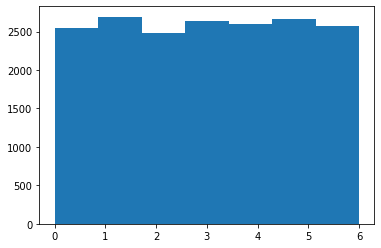

In [289]:
mcName = []
for gid in range(cells.size):
    mcName.append(int(nodesinfo['region'][gid][2:3]))  
plt.hist(mcName, bins = 7)

## Net info

In [8]:
# data-bbp/20191017/sonata/edges ~ 7.4 Gb 
circuit_path2 = '/home/fernando/CA1__/data-bbp/20191017/circuit_config.json'
circuit2 = Circuit(circuit_path2)
conn = circuit2.edges["hippocampus_neurons__hippocampus_neurons__chemical"]
print(list(circuit.nodes))
print(list(circuit2.edges))

['hippocampus_neurons', 'hippocampus_projections']
['hippocampus_neurons__hippocampus_neurons__chemical', 'hippocampus_projections__hippocampus_neurons__chemical']


In [10]:
conn?

In [9]:
# cells = circuit.nodes["hippocampus_neurons"]
# conn = circuit.edges["hippocampus_neurons__hippocampus_neurons__chemical"]
# proj_cells =circuit.nodes["hippocampus_projections"]
# proj_conn =circuit.edges["hippocampus_projections__hippocampus_neurons__chemical"]
print(cells.size)
print(conn.size)

18198
19698045


In [110]:
pre_mtype = 'SP_PC'
post_mtype = 'SP_PVBC' 
print(pre_mtype, post_mtype)
it = conn.iter_connections(pre_mtype, post_mtype, return_edge_count=True)
nodepre = np.array([p[0] for p in itertools.islice(it, 10000000)])
it = conn.iter_connections(pre_mtype, post_mtype, return_edge_count=True)
nodepost = np.array([p[1] for p in itertools.islice(it, 10000000)])
it = conn.iter_connections(pre_mtype, post_mtype, return_edge_count=True)
synnumber = np.array([p[2] for p in itertools.islice(it, 10000000)])

print(np.size(synnumber),np.sum(synnumber),np.mean(synnumber),np.std(synnumber))
print(np.max(nodepre)-np.min(nodepre)+1,np.max(nodepost)-np.min(nodepost)+1)
print(np.min(nodepre),np.max(nodepre),np.min(nodepost),np.max(nodepost))

SP_PC SP_PVBC
253092 1245510 4.921174908728842 2.508239893425534
16860 299
36 16895 16896 17194


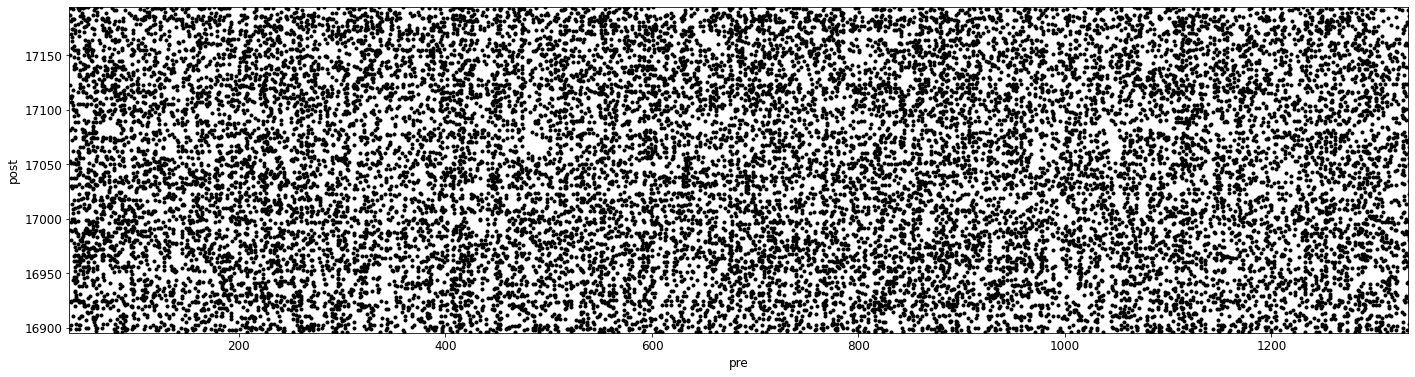

In [20]:
fig=plt.figure(figsize=(24, 6))
plt.plot(nodepre,nodepost,'.', color='black', alpha=1.0)
plt.grid(False)
plt.xlabel('pre', fontsize=12)
plt.ylabel('post', fontsize=12)
plt.xlim(np.min(nodepre)-0.5,np.min(nodepre)+1296.5)
plt.ylim(np.min(nodepost)-0.5,np.max(nodepost)+0.5)
#plt.xticks(fontsize=14, rotation=90)
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

# fig.savefig('Adj.png')

In [111]:
pre_mtype = 'SP_PC'
post_mtype = 'SP_PC' 
print(pre_mtype, post_mtype)
it = conn.iter_connections(pre_mtype, post_mtype, return_edge_count=True)
nodepre = np.array([p[0] for p in itertools.islice(it, 10000000)])
it = conn.iter_connections(pre_mtype, post_mtype, return_edge_count=True)
nodepost = np.array([p[1] for p in itertools.islice(it, 10000000)])
it = conn.iter_connections(pre_mtype, post_mtype, return_edge_count=True)
synnumber = np.array([p[2] for p in itertools.islice(it, 10000000)])

print(np.size(synnumber),np.sum(synnumber),np.mean(synnumber),np.std(synnumber))
print(np.max(nodepre)-np.min(nodepre)+1,np.max(nodepost)-np.min(nodepost)+1)
print(np.min(nodepre),np.max(nodepre),np.min(nodepost),np.max(nodepost))

SP_PC SP_PC
2783388 3553062 1.2765241497053232 0.6550574580415391
16860 16860
36 16895 36 16895


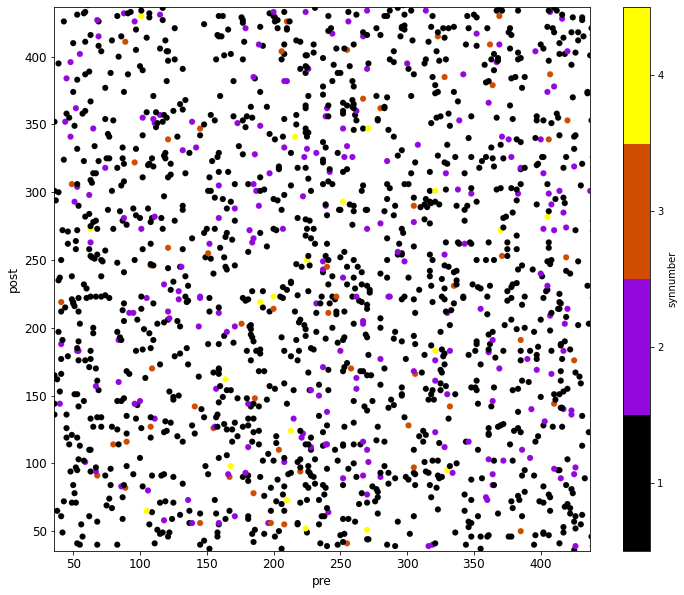

In [141]:
# plot the results
fig=plt.figure(figsize=(12, 10))
plt.scatter(nodepre,nodepost, lw=0.1,
            c=synnumber, cmap=plt.cm.get_cmap('gnuplot', 4))
plt.colorbar(ticks=range(6), label='synnumber')
plt.clim(0.5, 4.5)
plt.grid(False)
plt.xlabel('pre', fontsize=12)
plt.ylabel('post', fontsize=12)
plt.xlim(np.min(nodepre)-0.5,np.min(nodepre)+400.5)
plt.ylim(np.min(nodepre)-0.5,np.min(nodepre)+400.5)
#plt.xticks(fontsize=14, rotation=90)
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

In [113]:
for gid in nodepre[:4]:
    print('%d %s %s %.2f %.2f %.2f' % (gid,nodesinfo['mtype'][gid],nodesinfo['region'][gid],nodesinfo['x'][gid],nodesinfo['y'][gid],nodesinfo['z'][gid]))
print('')
for gid in nodepost[:4]:
    print('%d %s %s %.2f %.2f %.2f' % (gid,nodesinfo['mtype'][gid],nodesinfo['region'][gid],nodesinfo['x'][gid],nodesinfo['y'][gid],nodesinfo['z'][gid]))
print('')
for gid in nodepre[253092-4:253092+1]:
    print('%d %s %s %.2f %.2f %.2f' % (gid,nodesinfo['mtype'][gid],nodesinfo['region'][gid],nodesinfo['x'][gid],nodesinfo['y'][gid],nodesinfo['z'][gid]))
print('')
for gid in nodepost[253092-4:253092+1]:
    print('%d %s %s %.2f %.2f %.2f' % (gid,nodesinfo['mtype'][gid],nodesinfo['region'][gid],nodesinfo['x'][gid],nodesinfo['y'][gid],nodesinfo['z'][gid]))
          

425 SP_PC mc4;SP 92.11 212.29 962.25
674 SP_PC mc0;SP 173.86 229.53 178.24
1883 SP_PC mc0;SP 418.88 224.12 92.80
2289 SP_PC mc1;SP 144.55 214.23 267.54

36 SP_PC mc0;SP 128.92 222.86 209.59
36 SP_PC mc0;SP 128.92 222.86 209.59
36 SP_PC mc0;SP 128.92 222.86 209.59
36 SP_PC mc0;SP 128.92 222.86 209.59

13110 SP_PC mc2;SP 278.24 205.41 805.37
13240 SP_PC mc2;SP 486.34 171.36 615.20
13263 SP_PC mc4;SP -15.75 221.85 1038.10
13307 SP_PC mc5;SP 390.22 182.53 1203.73
13315 SP_PC mc2;SP 175.61 199.02 647.10

1574 SP_PC mc5;SP 316.06 186.42 1176.53
1574 SP_PC mc5;SP 316.06 186.42 1176.53
1574 SP_PC mc5;SP 316.06 186.42 1176.53
1574 SP_PC mc5;SP 316.06 186.42 1176.53
1574 SP_PC mc5;SP 316.06 186.42 1176.53


In [142]:
def distance3D(gidpre,gidpost):
    return np.sqrt(np.power(nodesinfo['x'][gidpre]-nodesinfo['x'][gidpost],2)+np.power(nodesinfo['y'][gidpre]-nodesinfo['y'][gidpost],2)+np.power(nodesinfo['z'][gidpre]-nodesinfo['z'][gidpost],2))

In [191]:
i=0
mcout = {}
for gid in range(7):
    mcout[gid] = {}
    for gidpost in range(7):
        mcout[gid][gidpost] = 0

distance_3D = []           
nodeprex = []
nodepostx = []   
nodeprez = []
nodepostz = []         
nodeprey = []
nodeposty = []   
for numsyn in synnumber:
    gid = nodepre[i]
    gidpost = nodepost[i]
    mcout[int(nodesinfo['region'][gid][2:3])][int(nodesinfo['region'][gidpost][2:3])] += 1
    if nodesinfo['region'][gid][0:3]=='mc2':     
        nodeprex.append(nodesinfo['x'][gid])
        nodepostx.append(nodesinfo['x'][gidpost]) 
        nodeprey.append(nodesinfo['y'][gid])
        nodeposty.append(nodesinfo['y'][gidpost])
        nodeprez.append(nodesinfo['z'][gid])
        nodepostz.append(nodesinfo['z'][gidpost])
        distance_3D.append(distance3D(gid,gidpost))  
    
#     if nodesinfo['region'][gid][0:3] != nodesinfo['region'][gidpost][0:3]:
#     if distance3D(gid,gidpost)<50.0 and nodesinfo['region'][gid][0:3]=='mc2' and nodesinfo['region'][gidpost][0:3]=='mc1':
#         print('%d %s %s %.2f' % (numsyn,nodesinfo['region'][gid][0:3],nodesinfo['region'][gidpost][0:3],distance3D(gid,gidpost)))
#         distance_3D.append(distance3D(gid,gidpost))
        
    i+=1
# print(mc2in,mc2out)

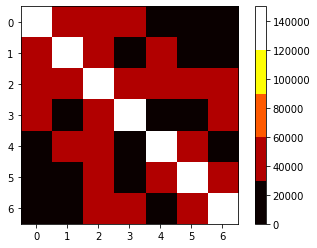

In [192]:
harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])
for gid in range(7):
    for gidpost in range(7):
        harvest[gid][gidpost] = float(mcout[gid][gidpost])

plt.imshow(harvest, cmap=plt.cm.get_cmap('hot', 5))
plt.colorbar()
plt.clim(0,150000)

In [194]:
print(np.size(nodepre),np.size(nodeprex),100*np.size(nodeprex)/np.size(nodepre))

2783388 468474 16.831070623283566


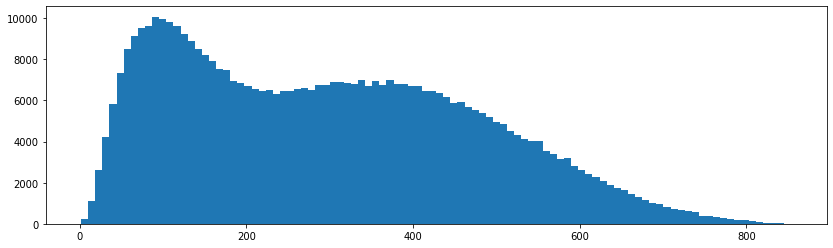

In [212]:
fig=plt.figure(figsize=(14,4))
plt.hist(distance_3D, bins=100);

In [217]:
print(np.max(nodepostz)-np.min(nodepostz),np.max(nodepostx)-np.min(nodepostx))

1259.2435193450285 1197.7552169295802


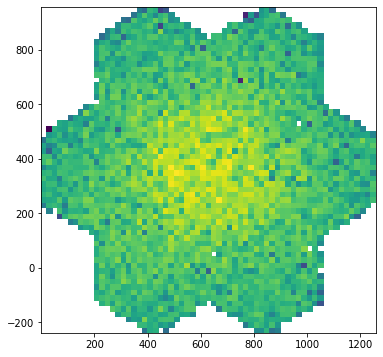

In [224]:
from matplotlib import colors
fig=plt.figure(figsize=(6,6))
plt.hist2d(nodepostz,nodepostx, bins=(63,60), norm=colors.LogNorm());

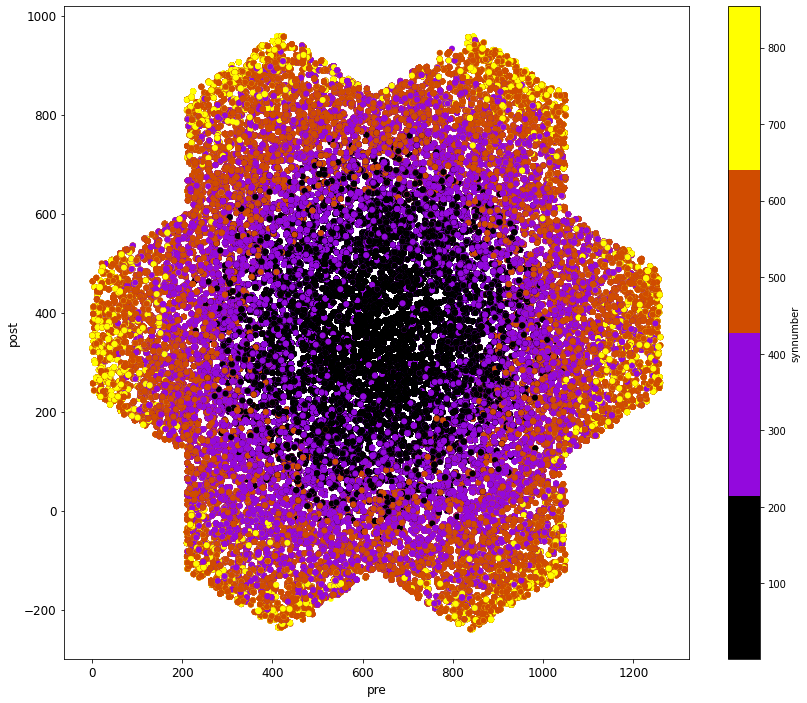

In [200]:
# plot the results
fig=plt.figure(figsize=(14,12))
# plt.scatter(nodeprez,nodeprex, lw=0.05,
#             c=distance_3D, cmap=plt.cm.get_cmap('gnuplot', 4))
plt.scatter(nodepostz,nodepostx, lw=0.05,
            c=distance_3D, cmap=plt.cm.get_cmap('gnuplot', 4))
# plt.colorbar(ticks=range(4), label='synnumber')
plt.colorbar(label='synnumber')
# plt.clim(0.5, 200.5)
plt.grid(False)
plt.xlabel('pre', fontsize=12)
plt.ylabel('post', fontsize=12)
# plt.xlim(np.min(nodepre2)-0.5,np.min(nodepre2)+400.5)
# plt.ylim(np.min(nodepre2)-0.5,np.min(nodepre2)+400.5)
#plt.xticks(fontsize=14, rotation=90)
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

## Only mc2PC:mc2PC

In [244]:
i=0
mcout = {}
for gid in range(7):
    mcout[gid] = {}
    for gidpost in range(7):
        mcout[gid][gidpost] = 0

distance_3D = []             
nodepre2 = []
nodepost2 = []           
nodeprex = []
nodepostx = []   
nodeprez = []
nodepostz = []         
nodeprey = []
nodeposty = []   
for numsyn in synnumber:
    gid = nodepre[i]
    gidpost = nodepost[i]
    mcout[int(nodesinfo['region'][gid][2:3])][int(nodesinfo['region'][gidpost][2:3])] += 1
    if nodesinfo['region'][gid][0:3]=='mc2' and nodesinfo['region'][gidpost][0:3]=='mc2':   
        nodepre2.append(gid)
        nodepost2.append(gidpost)    
        nodeprex.append(nodesinfo['x'][gid])
        nodepostx.append(nodesinfo['x'][gidpost]) 
        nodeprey.append(nodesinfo['y'][gid])
        nodeposty.append(nodesinfo['y'][gidpost])
        nodeprez.append(nodesinfo['z'][gid])
        nodepostz.append(nodesinfo['z'][gidpost])
        distance_3D.append(distance3D(gid,gidpost))              
    i+=1

In [245]:
print(np.size(nodepre),np.size(nodeprex),100*np.size(nodeprex)/np.size(nodepre))

2783388 149586 5.374241751419493


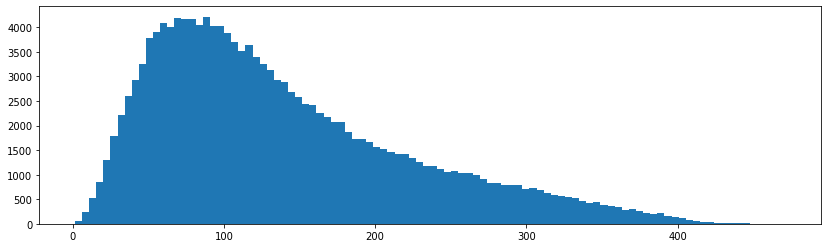

In [252]:
fig=plt.figure(figsize=(14,4))
plt.hist(distance_3D, bins=100);

In [247]:
print(np.max(nodepostz)-np.min(nodepostz),np.max(nodepostx)-np.min(nodepostx))

419.6228977761445 470.18203023229825


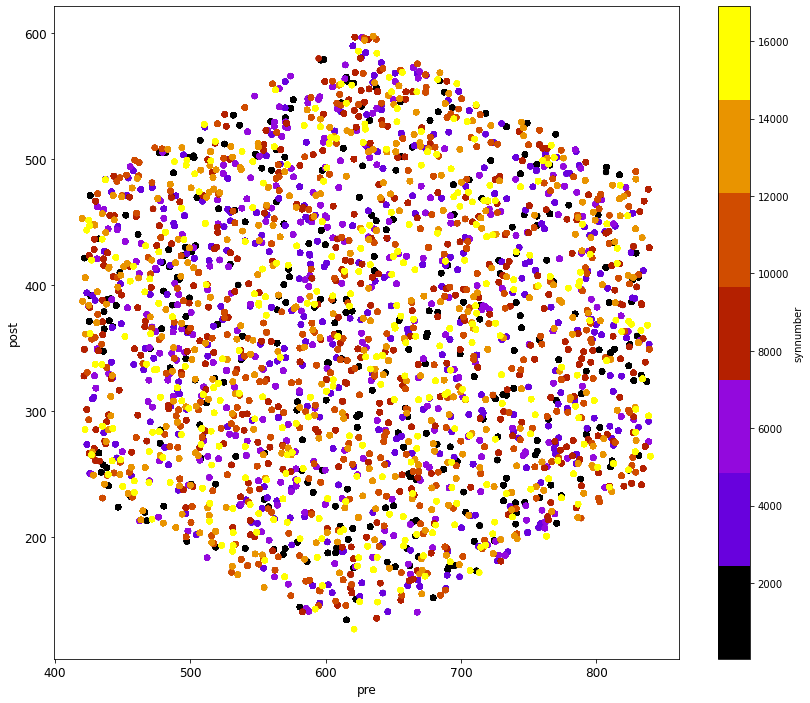

In [258]:
# plot the results
fig=plt.figure(figsize=(14,12))
# plt.scatter(nodeprez,nodeprex, lw=0.05,
#             c=distance_3D, cmap=plt.cm.get_cmap('gnuplot', 4))
plt.scatter(nodepostz,nodepostx, lw=0.05,
            c=nodepost2, cmap=plt.cm.get_cmap('gnuplot', 7))
# plt.colorbar(ticks=range(4), label='synnumber')
plt.colorbar(label='synnumber')
# plt.clim(0.5, 200.5)
plt.grid(False)
plt.xlabel('pre', fontsize=12)
plt.ylabel('post', fontsize=12)
# plt.xlim(np.min(nodepre2)-0.5,np.min(nodepre2)+400.5)
# plt.ylim(np.min(nodepre2)-0.5,np.min(nodepre2)+400.5)
#plt.xticks(fontsize=14, rotation=90)
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

(array([2553., 2694., 2484., 2633., 2595., 2664., 2575.]),
 array([0.        , 0.85714286, 1.71428571, 2.57142857, 3.42857143,
        4.28571429, 5.14285714, 6.        ]),
 <BarContainer object of 7 artists>)

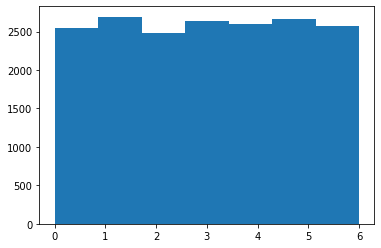

In [132]:
i=0
for gid in range(np.min(nodepre),np.max(nodepre)+1):
    for gidpost in range(np.min(nodepost),np.max(nodepost)+1):
        if distance3D(gid,gidpost)<50.0:
            i+=1
i

27355

In [131]:
np.size(distance_3D)

5470

In [10]:
mtypes = cells.property_values(Cell.MTYPE)
model_mean = pd.DataFrame(index=mtypes, columns=mtypes, dtype=float)
model_std = pd.DataFrame(index=mtypes, columns=mtypes, dtype=float)

In [114]:
nsample = 1000
def sample_nsyn(pre, post):
    it = conn.iter_connections(pre, post, return_edge_count=True)
    return np.array([p[2] for p in itertools.islice(it, nsample)])

In [32]:
for pre_mtype in mtypes:
    for post_mtype in mtypes:
        data = sample_nsyn(
            pre={Cell.MTYPE: pre_mtype, Cell.REGION: {'$regex': 'mc2.*'}},
            post={Cell.MTYPE: post_mtype}
        )
        if len(data) != 0:
            model_mean[post_mtype][pre_mtype] = data.mean()
            model_std[post_mtype][pre_mtype] = data.std()

In [33]:
model_mean

,SR_SCA,All,SLM_PPA,SP_BS,SO_BP,SP_CCKBC,SP_AA,SP_PC,SO_BS,SP_PVBC,SO_OLM,SP_Ivy,SO_Tri
SR_SCA,4.200000,NaN,NaN,1.304348,1.000000,1.142857,1.090909,5.25,1.636364,1.436782,1.111111,1.258427,1.000000
All,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SLM_PPA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SP_BS,2.210526,NaN,NaN,4.246753,2.222222,1.800000,2.870968,5.99,2.153846,4.240000,1.603774,3.880000,2.655172
SO_BP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SP_CCKBC,1.285714,NaN,NaN,4.780000,2.666667,1.400000,1.712644,8.64,1.750000,4.160000,1.272727,3.210000,3.073171
SP_AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.24,NaN,NaN,NaN,NaN,NaN
SP_PC,2.610000,NaN,NaN,3.350000,2.580000,3.020000,3.770000,1.28,6.330000,5.250000,2.810000,3.660000,4.030000
SO_BS,1.833333,NaN,NaN,2.312500,1.500000,1.541667,1.545455,6.50,NaN,3.204545,1.600000,2.486111,1.333333
SP_PVBC,1.088889,NaN,NaN,2.870000,1.062500,1.200000,1.260000,10.64,1.375000,2.370000,1.326087,1.900000,1.640000


In [135]:
for gidpre in range(0,7,2):
    print(gidpre,nodesinfo['region'][gidpre][0:3],nodesinfo['mtype'][gidpre])
    for gid in conn.afferent_nodes(gidpre):
        print('  ',gid,nodesinfo['region'][gid][0:3],nodesinfo['mtype'][gid])

0 mc5 SLM_PPA
   18041 mc5 SO_OLM
   18069 mc5 SO_OLM
   18081 mc5 SO_OLM
   18091 mc5 SO_OLM
   18095 mc5 SO_OLM
   18115 mc6 SO_OLM
   18145 mc1 SO_BS
2 mc6 SLM_PPA
   0 mc5 SLM_PPA
   17477 mc6 SP_BS
   18066 mc6 SO_OLM
   18078 mc6 SO_OLM
   18082 mc5 SO_OLM
   18117 mc5 SO_OLM
   18190 mc6 SO_BP
   18191 mc6 SO_BP
4 mc5 SR_SCA
   5 mc5 SR_SCA
   7 mc5 SR_SCA
   16 mc5 SR_SCA
   19 mc6 SR_SCA
   28 mc5 SR_SCA
   29 mc6 SR_SCA
   32 mc5 SR_SCA
   33 mc6 SR_SCA
   35 mc5 SR_SCA
   46 mc5 SP_PC
   121 mc5 SP_PC
   152 mc2 SP_PC
   156 mc2 SP_PC
   157 mc5 SP_PC
   178 mc4 SP_PC
   207 mc2 SP_PC
   212 mc5 SP_PC
   220 mc5 SP_PC
   253 mc5 SP_PC
   258 mc6 SP_PC
   262 mc2 SP_PC
   274 mc0 SP_PC
   281 mc0 SP_PC
   287 mc5 SP_PC
   294 mc5 SP_PC
   349 mc2 SP_PC
   361 mc6 SP_PC
   383 mc4 SP_PC
   384 mc4 SP_PC
   480 mc5 SP_PC
   486 mc6 SP_PC
   502 mc5 SP_PC
   511 mc2 SP_PC
   526 mc5 SP_PC
   532 mc5 SP_PC
   552 mc4 SP_PC
   560 mc2 SP_PC
   572 mc6 SP_PC
   575 mc3 SP_PC
   590

   17701 mc5 SP_Ivy
   17724 mc5 SP_Ivy
   17725 mc5 SP_Ivy
   17733 mc5 SP_Ivy
   17734 mc5 SP_Ivy
   17737 mc6 SP_Ivy
   17741 mc6 SP_Ivy
   17747 mc6 SP_Ivy
   17764 mc5 SP_Ivy
   17767 mc5 SP_Ivy
   17769 mc5 SP_Ivy
   17774 mc5 SP_Ivy
   17809 mc5 SP_Ivy
   17810 mc5 SP_Ivy
   17814 mc6 SP_Ivy
   17855 mc5 SP_Ivy
   17862 mc5 SP_Ivy
   17866 mc6 SP_Ivy
   17868 mc5 SP_Ivy
   17873 mc6 SP_Ivy
   17894 mc5 SP_Ivy
   17952 mc5 SP_Ivy
   17957 mc2 SP_Ivy
   17962 mc5 SP_Ivy
   17963 mc5 SP_Ivy
   17965 mc5 SP_Ivy
   17972 mc5 SP_Ivy
   17973 mc2 SP_Ivy
   17984 mc2 SP_Ivy
   18013 mc5 SP_Ivy
   18032 mc5 SP_Ivy
   18090 mc5 SO_OLM
   18136 mc4 SO_BS
   18156 mc5 SO_Tri
   18159 mc5 SO_Tri
   18162 mc2 SO_Tri
   18184 mc5 SO_Tri
   18191 mc6 SO_BP
6 mc0 SR_SCA
   12 mc3 SR_SCA
   21 mc2 SR_SCA
   25 mc2 SR_SCA
   215 mc2 SP_PC
   218 mc0 SP_PC
   234 mc2 SP_PC
   248 mc3 SP_PC
   291 mc3 SP_PC
   319 mc0 SP_PC
   393 mc0 SP_PC
   417 mc1 SP_PC
   456 mc0 SP_PC
   469 mc6 SP_PC
   539 m

In [137]:
# we sample the edges to reduce the memory usage
N = 10000
sampled_edge_ids = np.random.choice(conn.size, N, replace=False)

In [138]:
print(conn.size, cells.size)

19698045 18198


In [136]:
import nrrd

In [148]:
atlas_directory = '/home/fernando/CA1__/data-bbp/20191017/atlas'
br_data, br_metadata = nrrd.read(Path(atlas_directory, "brain_regions.nrrd"))

TypeError: 'str' object is not callable

In [147]:
atlas_directory = '/home/fernando/CA1__/data-bbp/20191017/atlas'
br_data, br_metadata = nrrd.read(Path(atlas_directory, "brain_regions.nrrd"))

# hierarchy contains the region hierarchy: 01 -> [mc0->[mc0;SO, mc0;SP, ...], mc1-> [mc1;SO, mc1;SP, ...], ...]
hierarchy = json.load(open(Path(atlas_directory, "hierarchy.json")))

id_layer_map = {}
for column in hierarchy["children"]:
    for region in column["children"]:
        id_ = region["id"]
        layer = region["acronym"].split(";")[-1]
        id_layer_map[id_] = layer
id_layer_map[0] = 'out'

spacing = br_metadata["space directions"].diagonal()
offset = br_metadata["space origin"]

AttributeError: 'str' object has no attribute 'read'

In [140]:
# we get the position of all the synapses from the projections and add it to a pandas dataframe
synapses = conn.positions(sampled_edge_ids, 'afferent', "center")

indices = np.array((synapses[["x", "y", "z"]].to_numpy() - offset) / spacing, dtype=int)
labels = br_data[tuple(indices.T)]
def _apply_mapping(x):
    return id_layer_map[x]

apply_mapping = np.vectorize(_apply_mapping)
layers = apply_mapping(labels)
synapses['layer'] = layers

NameError: name 'offset' is not defined